# Data Exploration & Analysis

## To Do:
1. Create regression model that will predict expected price of a car
2. Create clustered map of "good deals" within different regions

In [1]:
import pandas as pd
import os
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import statsmodels.formula.api as sm

plt.style.use('ggplot')
%matplotlib inline

# Exploratory Analysis
1. Scroll through the dataframe for any obvious errors
2. Describe command to verify the descriptive statistics
3. Visualize using the scatterplot matrix to explore histograms of each parameter and look for outliers/trends
4. Heat map of the correlation matrix to determine which parameters are strongly correlated to identify potential strong predictors for the multiple linear regression or potential confounders

In [2]:
# Read in scraped car data
data_file = os.path.join(os.getcwd(),"data","all_cars.csv")  # change to updated scraped data file
cars = pd.read_csv(data_file)
pd.set_option("display.max_rows",None,"display.max_columns",None) 

# Recast data
cars['mileage'] = cars['mileage'].astype('float')
cars['year'] = cars['year'].astype('float')

# Clean price data and recast
ugly_cars = cars[cars['price'].str.contains('MSRP')]
ugly_cars.index
for index, car in ugly_cars.iterrows():
    if '|' not in car['price']:
        cars.at[index,'price'] = None
    else:
        cars.at[index,'price'] = car['price'].split('|')[0].strip()
cars['price'] = cars['price'].astype('float')

## Data Exploration
### Descriptive Statistics

In [3]:
display(cars.describe())
display(cars.info())

,lastpull_ts,price,year,mileage,liters,cylinders,n_doors,n_pics
count,3.445600e+04,34446.000000,34454.000000,3.438200e+04,2523.000000,34191.000000,26498.000000,34456.000000
mean,1.585096e+09,19276.512977,2013.238202,1.515111e+05,3.901585,5.633968,3.875349,21.386754
std,1.831211e+05,14269.170724,7.008597,1.166959e+07,19.824867,1.575497,0.533204,13.785523
min,1.584808e+09,1.000000,1901.000000,1.000000e+00,0.000000,1.000000,1.000000,0.000000
25%,1.584941e+09,9300.000000,2011.000000,2.771425e+04,2.400000,4.000000,4.000000,10.000000
50%,1.585155e+09,16864.500000,2016.000000,5.711000e+04,3.300000,6.000000,4.000000,22.000000
75%,1.585274e+09,26314.500000,2018.000000,1.082035e+05,4.700000,6.000000,4.000000,30.000000
max,1.585376e+09,700000.000000,2020.000000,2.147484e+09,996.000000,12.000000,5.000000,214.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34456 entries, 0 to 34455
Data columns (total 26 columns):
post_date        34456 non-null object
lastpull_ts      34456 non-null int64
link             34456 non-null object
price            34446 non-null float64
year             34454 non-null float64
make             34454 non-null object
model            34454 non-null object
body             34380 non-null object
mileage          34382 non-null float64
title_type       17236 non-null object
city             34308 non-null object
state            34308 non-null object
seller           34456 non-null object
trim             29217 non-null object
ext_color        32509 non-null object
int_color        29105 non-null object
transmission     31444 non-null object
liters           2523 non-null float64
cylinders        34191 non-null float64
fuel_type        34353 non-null object
n_doors          26498 non-null float64
ext_condition    8610 non-null object
int_condition    8600 non-null

None

,lastpull_ts,price,year,mileage,liters,cylinders,n_doors,n_pics
count,3.445600e+04,34436.000000,34453.000000,34368.000000,2523.000000,34191.000000,26498.000000,34456.000000
mean,1.585096e+09,19282.104513,2013.241459,74344.603090,3.901585,5.633968,3.875349,21.386754
std,1.831211e+05,14267.468663,6.982563,59978.527026,19.824867,1.575497,0.533204,13.785523
min,1.584808e+09,100.000000,1924.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,1.584941e+09,9300.000000,2011.000000,27711.750000,2.400000,4.000000,4.000000,10.000000
50%,1.585155e+09,16876.000000,2016.000000,57073.500000,3.300000,6.000000,4.000000,22.000000
75%,1.585274e+09,26333.750000,2018.000000,108138.750000,4.700000,6.000000,4.000000,30.000000
max,1.585376e+09,700000.000000,2020.000000,764388.000000,996.000000,12.000000,5.000000,214.000000


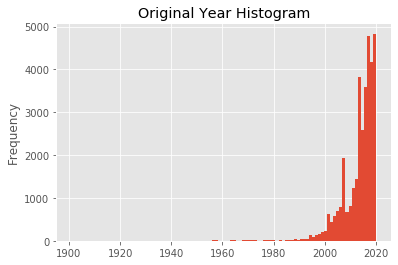

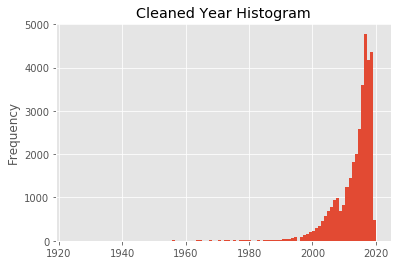

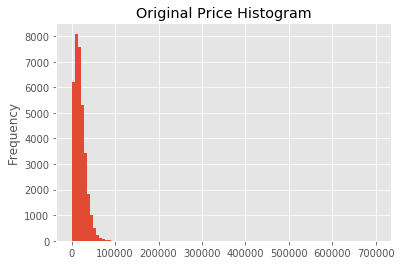

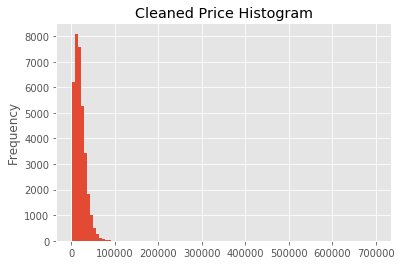

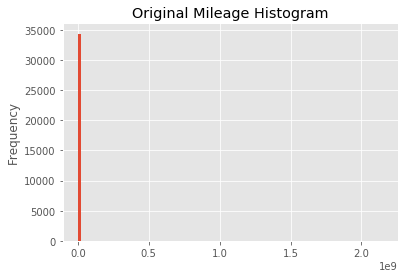

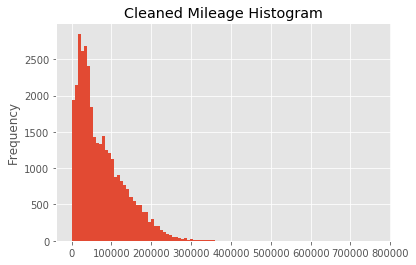

In [4]:
# Data clean up
# Check year
plt.figure()
cars["year"].plot.hist(bins=100)
plt.title('Original Year Histogram')
# any cars with a year less than 1920 changed to None
cars.loc[(cars.year < 1920),'year']=None 
plt.figure()
cars["year"].plot.hist(bins=100)
plt.title('Cleaned Year Histogram')

# Check price
plt.figure()
cars["price"].plot.hist(bins=100)
plt.title('Original Price Histogram')
# any cars with a price less than $100 changed to None
cars.loc[(cars.price < 100),'price']=None 
plt.figure()
cars["price"].plot.hist(bins=100)
plt.title('Cleaned Price Histogram')

# Check Mileage
plt.figure()
cars["mileage"].plot.hist(bins=100)
plt.title('Original Mileage Histogram')
# any cars with a mileage less than 900000 changed to None
cars.loc[(cars.mileage > 900000),'mileage']=None 
plt.figure()
cars["mileage"].plot.hist(bins=100)
plt.title('Cleaned Mileage Histogram')

cars.describe()

### Data Cleaning Interpretation
Looking at the histograms and descriptive statistics had to clean the data and remove outliers. We changed the data to missing if the car year was greater than 1920, the price was less than $100, or the mileage was greater than 900,000. This cleaned up most of the outliers.

### Scatter Matrix & Correlation Matrix

,lastpull_ts,price,year,mileage,liters,cylinders,n_doors,n_pics
lastpull_ts,1.000000,-0.003685,-0.007253,0.009441,0.007259,0.005848,-0.011841,-0.017755
price,-0.003685,1.000000,0.450391,-0.528805,0.064177,0.302405,0.054962,0.236989
year,-0.007253,0.450391,1.000000,-0.628681,-0.006228,-0.199342,0.351690,0.272806
mileage,0.009441,-0.528805,-0.628681,1.000000,0.004020,0.198462,-0.087233,-0.275163
liters,0.007259,0.064177,-0.006228,0.004020,1.000000,0.100932,-0.002182,-0.000817
cylinders,0.005848,0.302405,-0.199342,0.198462,0.100932,1.000000,-0.094966,0.013540
n_doors,-0.011841,0.054962,0.351690,-0.087233,-0.002182,-0.094966,1.000000,0.101447
n_pics,-0.017755,0.236989,0.272806,-0.275163,-0.000817,0.013540,0.101447,1.000000


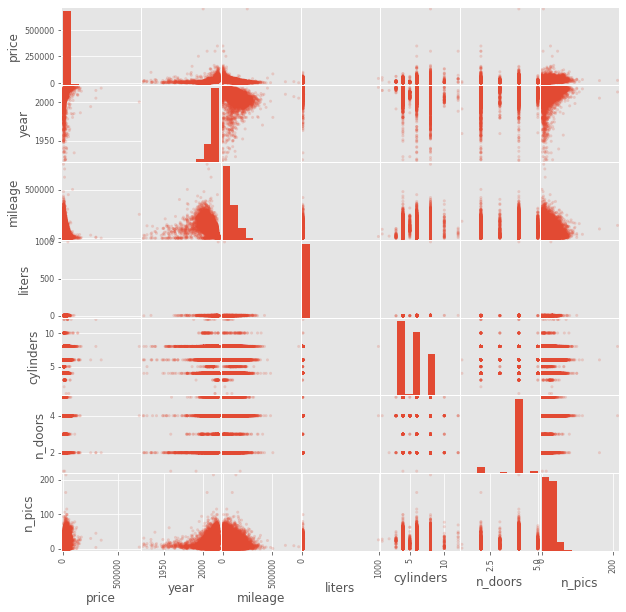

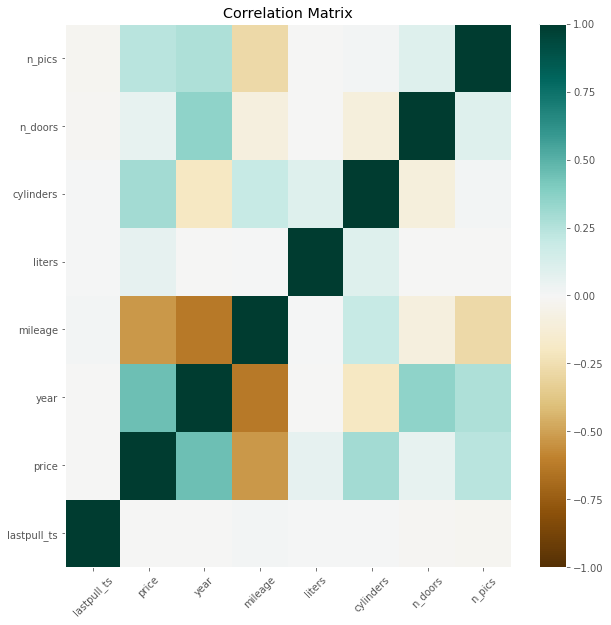

In [5]:
# Check histograms and scatter matrix for outliers
# Scatter Matrix
scatter_matrix(cars[["price", "year", "mileage", "liters", "cylinders", "n_doors", "n_pics"]], alpha = 0.2, figsize=(10, 10))
print()

# Correlation Matrix
# automatically ignores missing values
fig = plt.figure(figsize=(10,10));
ax = fig.add_subplot(111)
plt.pcolor(cars.corr(),vmin=-1,vmax=1, cmap=plt.cm.get_cmap('BrBG'))
labels = ['lastpull_ts','price','year','mileage','liters','cylinders','n_doors','n_pics'] # check labels for final df
plt.xticks([i+0.5 for i in range(len(labels))],labels=labels,rotation=45)
plt.yticks([i+0.5 for i in range(len(labels))],labels=labels)
plt.title("Correlation Matrix");
plt.colorbar();
display(cars.corr())

### Data Exploration Interpretation
The descriptive statistics look to be within a reasonable range after data cleaning.

The scatter matrix and correlation matrix show that the strongest correlations are negative for mileage x price ~-0.53, mileage x year ~0.63, year x price ~ 0.45. All of these variables are what we would expect to correlate. 

We will want to include categorical variables like title type in future analyses.

# Analysis
## Regression
Aim: predict the price of a newly-listed used car
Dependent variable:list price 
Possible independent variables:year, seller type (dealer, private),mileage, color, title (clean/salvaged), transmission type, cylinders, fuel type, number of doors, exterior/interior condition, listing date, page views per day (when a listing has reached 7 days). 
We will use the Python package statsmodels to perform all regression analyses. 
1. Multiple linear regression first using the parameters that had strong correlations with list price. 
2. Based off of this initial model we will adjust our multiple linear regression to only include parameters that have significant p-values for their individual coefficients. 
Significance level: 𝝰=0.05

Expected Outcomes:
* Our final model should have a p-value < 0.05 for the F-statistic of the overall model. 
* We are aiming to explain at least 70% of the variance with our model and hope to get anR-squared value of 0.70 or more.

## Clustering
Aim: Cluster what we classify as a “good deal” in its respective geographical location and create clusters
showing areas in Utah where cars are generally sold for a good deal. 

## Regression

In [6]:
# multiple linear regression
# set missing option to drop any missing data
"price", "year", "mileage", "liters", "cylinders", "n_doors", "n_pics"
df_all_ols = sm.ols(formula="price ~ year + mileage + liters + cylinders + n_doors + n_pics", data=cars, missing='drop').fit()
display(df_all_ols.summary())

# remove unsignificant variables
df_all_ols = sm.ols(formula="price ~ year + mileage + cylinders", data=cars, missing='drop').fit()
display(df_all_ols.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     453.6
Date:                Sat, 28 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:45:28   Log-Likelihood:                -22741.
No. Observations:                2183   AIC:                         4.550e+04
Df Residuals:                    2176   BIC:                         4.554e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.784e+05   6.56e+04    -10.334      0.000   -8.07e+05    -5.5e+05
year         339.4038     32.832     10.338      0.000     275.019     403.789
mileage       -0.1110      0.004    -29.558      0.000      -0.118      -0.104
liters        11.3972      8.186      1.392      0.164      -4.657      27.451
cylinders   3606.5987    115.497     31.227      0.000    3380.104    3833.094
n_doors      462.3366    371.282      1.245      0.213    -265.767    1190.440
n_pics        30.8863     14.205      2.174      0.030       3.029      58.744
==============================================================================
Omnibus:                      987.990   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11464.564
Skew:                           1.821   Prob(JB):                         0.00
Kurtosis:                      13.620   Cond. No.                     3.60e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.116e+04
Date:                Sat, 28 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:45:28   Log-Likelihood:            -3.6265e+05
No. Observations:               34091   AIC:                         7.253e+05
Df Residuals:                   34087   BIC:                         7.253e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.064e+06   2.15e+04    -49.448      0.000   -1.11e+06   -1.02e+06
year         530.8983     10.650     49.849      0.000     510.024     551.773
mileage       -0.1092      0.001    -90.816      0.000      -0.112      -0.107
cylinders   4009.6432     35.538    112.826      0.000    3939.987    4079.299
==============================================================================
Omnibus:                    64395.641   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        785361932.184
Skew:                          13.696   Prob(JB):                         0.00
Kurtosis:                     746.063   Cond. No.                     3.76e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression Interpretation
For the initial multiple linear regression including all continuous independent variables we were able to explain ~55% of the variance in the model to predict a car's price. This initial regression does not incorporate make or model of the car but is across all vehicles without missing data.

The second linear regression removed any variables that did not have an significant p value as predictors, so we only used year, mileage, and cylinders. This model explains ~50% of the variance across all cars.

### Future Directions
Do the regression for specific makes and models of cars. Compare our predicted price to the list price and the expected price based off of CarGurus formula.

## Clustering
Aim: Cluster what we classify as a “good deal” in its respective geographical location and create clusters
showing areas in Utah where cars are generally sold for a good deal. 